In [104]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install xgboost
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/b3/f8/ee33e36194eb03a76eccf3adac3fba51f0e56fbd20609bb531659d48d3cb/lightgbm-4.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.3 MB 1.1 MB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.3 MB 2.3 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.3 MB 3.2 MB/s eta 0:00:01
   --------------------------- ------------ 0.9/1.3 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 7.0 MB/s eta 0:00:00


In [112]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

In [4]:
diabetes=load_diabetes()

In [5]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [53]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [54]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [55]:
diabetes['target']

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [6]:
x=pd.DataFrame(data=diabetes['data'],columns=diabetes['feature_names'])

In [56]:
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [57]:
x.shape

(442, 10)

In [7]:
x.isna().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [10]:
y=pd.DataFrame(diabetes['target'],columns=['Target'])

In [11]:
y

,Target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [60]:
x.dtypes


age    float64
sex    float64
bmi    float64
bp     float64
s1     float64
s2     float64
s3     float64
s4     float64
s5     float64
s6     float64
dtype: object

In [61]:
y.dtypes

Target    float64
dtype: object

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=42)

In [13]:
x_train.shape,y_train.shape



((353, 10), (353, 1))

In [14]:
x_test.shape,y_test.shape

((89, 10), (89, 1))

In [15]:
model=DecisionTreeRegressor()

In [16]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [36]:
y_train_pred=model.predict(x_train)
r2_score(y_train,y_train_pred)

1.0

In [38]:
y_test_pred=model.predict(x_test)
r2_score(y_test,y_test_pred)

-0.017957278468193616

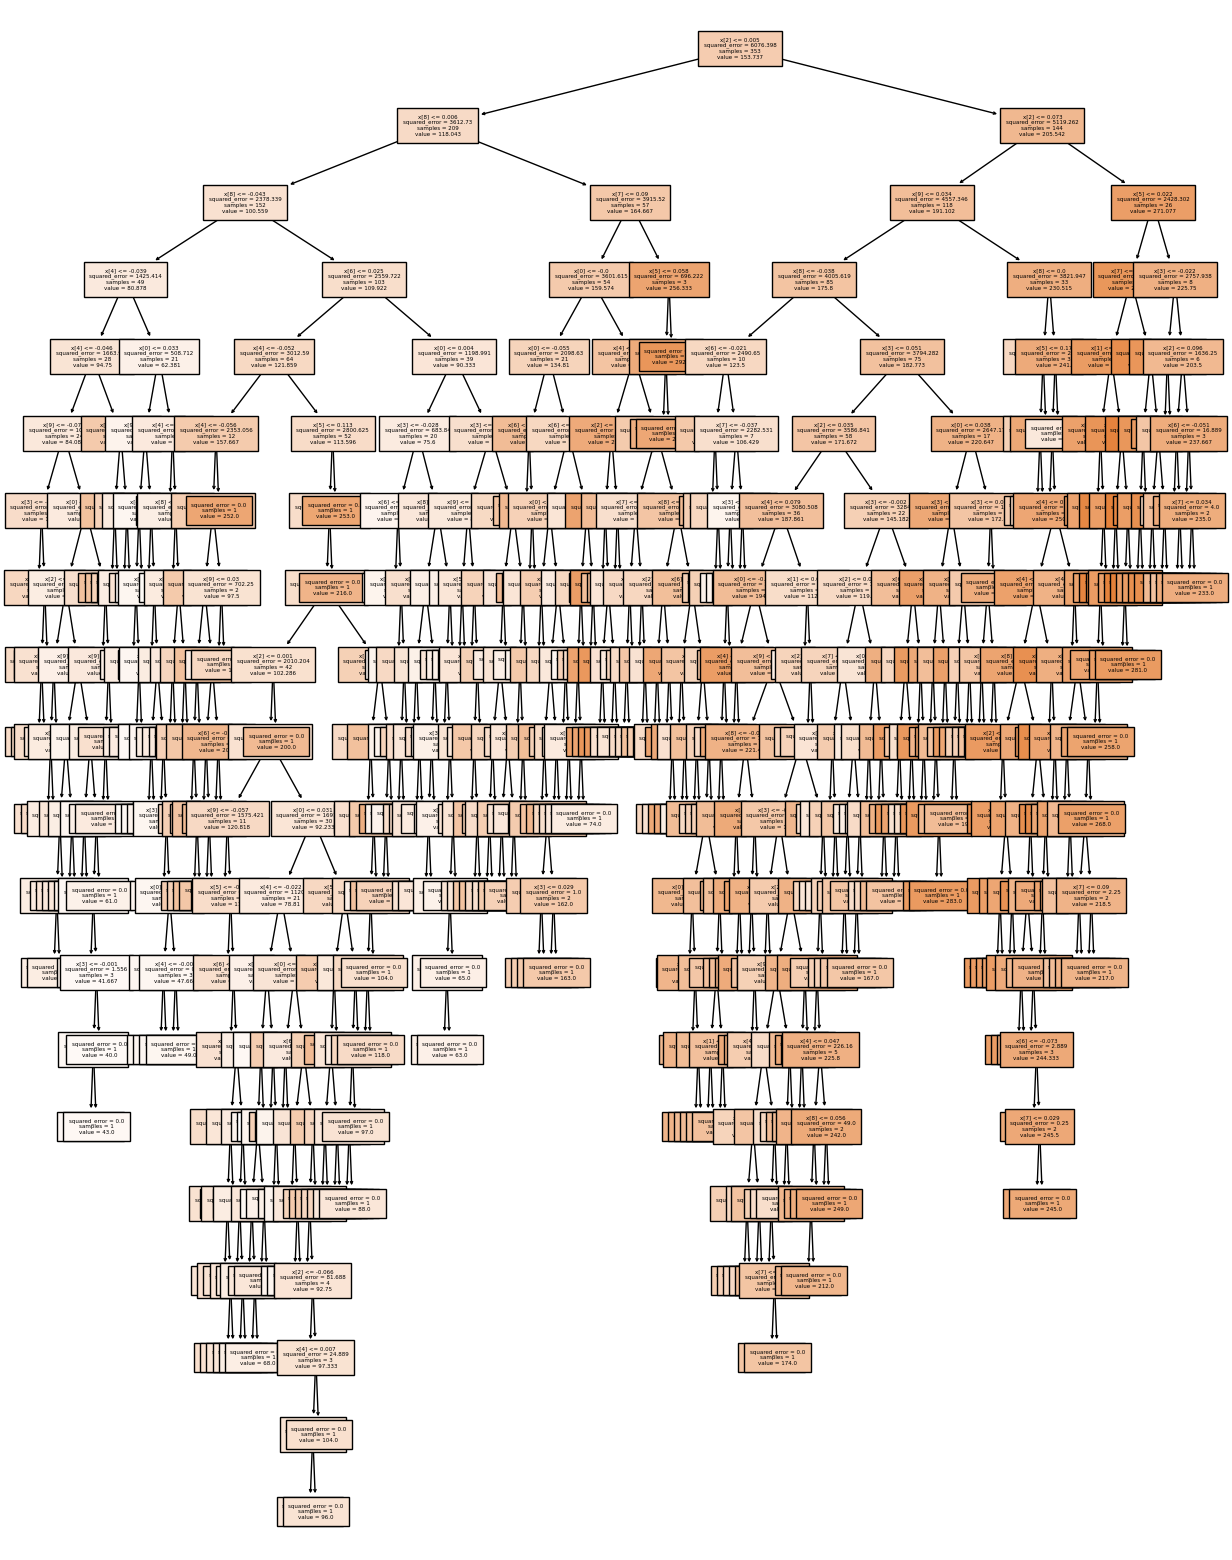

In [67]:
plt.figure(figsize=(15,20))
plot_tree(decision_tree=model,filled=True,fontsize=4)
plt.show()

In [45]:
model2=DecisionTreeRegressor(max_depth=1,criterion='friedman_mse')
model2.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=1)

In [43]:
y_train_pred=model2.predict(x_train)
r2_score(y_train,y_train_pred)

0.6686059290406436

In [44]:
y_train_pred=model2.predict(x_test)
r2_score(y_test,y_test_pred)

-0.017957278468193616

In [46]:
from sklearn.model_selection import GridSearchCV

In [73]:
grid_search=GridSearchCV(estimator=model,
param_grid={'criterion':['squared_error'],
'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13]},
cv=5)
grid_search.fit(x_train,y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)
     


0.35160918571106714
{'criterion': 'squared_error', 'max_depth': 2}


In [ ]:
DecisionTreeRegressor()

In [ ]:
##RANDOM FOREST

In [49]:
model_randomforest=RandomForestRegressor()

In [50]:
model_randomforest.fit(x_train,y_train)

RandomForestRegressor()

In [51]:
y_RF_train_pred=model_randomforest.predict(x_train)
r2_score(y_train,y_RF_train_pred)

0.9231539716276267

In [117]:
y_RF_test_pred=model_randomforest.predict(x_test)
r2_score(y_test,y_RF_test_pred)

0.42905981884190914

In [74]:
grid_search=GridSearchCV(estimator=model_randomforest,
param_grid={'criterion':['squared_error'],
'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13]},
cv=5)
grid_search.fit(x_train,y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.4155184026969138
{'criterion': 'squared_error', 'max_depth': 5}


In [ ]:
##Gradient boost


In [76]:
model_gradientboost=GradientBoostingRegressor()

In [78]:
model_gradientboost.fit(x_train,y_train)

GradientBoostingRegressor()

In [80]:
y_GB_train_pred=model_gradientboost.predict(x_train)
r2_score(y_train,y_GB_train_pred)

0.8359025987996851

In [83]:
y_GB_test_pred=model_gradientboost.predict(x_test)
r2_score(y_test,y_GB_test_pred)

0.4530083306372379

In [86]:
 grid_search=GridSearchCV(estimator=model_gradientboost,
param_grid={'criterion':['squared_error'],
'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13]},
cv=5)
grid_search.fit(x_train,y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.3896319700146895
{'criterion': 'squared_error', 'max_depth': 2}


In [ ]:
GradientBoostingRegressor()

In [ ]:
##Ada Grad boost


In [87]:
model_Adaboost=AdaBoostRegressor()

In [88]:
model_Adaboost.fit(x_train,y_train)

AdaBoostRegressor()

In [89]:
y_AD_train_pred=model_Adaboost.predict(x_train)
r2_score(y_train,y_AD_train_pred)

0.6401449667481597

In [113]:
y_AD_test_pred=model_Adaboost.predict(x_test)
r2_score(y_test,y_AD_test_pred)

0.43791651139837084

In [119]:
model_Adaboost.score(x_train,y_train)

0.6401449667481597

In [121]:
grid_search=GridSearchCV(estimator=model_Adaboost,
param_grid={'learning_rate':[1,0.1,0.01,0.001],
'n_estimators':[2,5,19,15,28,36,100,213]},
cv=5)
grid_search.fit(x_train,y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.4149502159470436
{'learning_rate': 0.1, 'n_estimators': 213}


In [ ]:
AdaBoostRegressor()

In [ ]:
## extreme grad boost

In [98]:
modelEXB=XGBRegressor()

In [99]:
modelEXB.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [100]:
y_EXB_train_pred=modelEXB.predict(x_train)
r2_score(y_train,y_EXB_train_pred)

0.9999960236879984

In [116]:
y_EXB_test_pred=modelEXB.predict(x_test)
r2_score(y_test,y_EXB_test_pred)

0.3675149756138415

In [115]:
grid_search=GridSearchCV(estimator=modelEXB,
param_grid={'criterion':['squared_error'],
'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13]},
cv=5)
grid_search.fit(x_train,y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.32384954998320625
{'criterion': 'squared_error', 'max_depth': 2}


In [ ]:
XGBRegressor()

In [ ]:
## Light grad boost


In [106]:
modelLGB=LGBMRegressor()

In [107]:
modelLGB.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 595
[LightGBM] [Info] Number of data points in the train set: 353, number of used features: 10
[LightGBM] [Info] Start training from score 153.736544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

LGBMRegressor()

In [108]:
y_LXB_train_pred=modelEXB.predict(x_train)
r2_score(y_train,y_LXB_train_pred)

0.9999960236879984

In [110]:
y_LXB_test_pred=modelEXB.predict(x_test)
r2_score(y_test,y_LXB_test_pred)

0.3675149756138415